In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock BA = Boeing T = AT&T MGM = MGM Resorts International (Hotel Industry) AMZN = Amazon IBM = IBM
# TSLA = Tesla Motors GOOG = Google sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock
# performance of 500 large companies listed on U.S. stock exchange) Check the list of S&P 500 companies here:
# https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stocks_df = pd.read_csv('stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [3]:
# sort stock data by date
stocks_df.sort_values(by=['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [4]:
# print number of stocks
print(f"Total Number of Stocks: {len(stocks_df.columns[1:])}")

Total Number of Stocks: 9


In [5]:
# print the name of the stocks
print('Stocks under consideration are:')
for i in stocks_df.columns[1:]:
    print(i)

Stocks under consideration are:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [6]:
# average return of stocks
print(f"\nMean of Stocks: \n{stocks_df.mean()}")


Mean of Stocks: 
AAPL      140.819823
BA        189.942700
T          35.162899
MGM        23.105743
AMZN      915.665665
IBM       161.853001
TSLA      259.600815
GOOG      783.712512
sp500    2218.749554
dtype: float64


In [7]:
# standard deviation
print(f"\nStandard Deviation of Stocks: \n{stocks_df.std()}")


Standard Deviation of Stocks: 
AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64


In [8]:
print(f"\nDescription of stocks: \n{stocks_df.describe()}")


Description of stocks: 
              AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     

# Exploratory Data Analysis and Basic Visualization

In [9]:
# check for null values
print(stocks_df.isnull().sum())

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64


In [10]:
# getting dataframe information
print(stocks_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB
None


In [11]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method
def show_plot(df, fig_title):
    df.plot(x='Date', figsize=(15, 7), linewidth=3, title=fig_title)
    plt.grid()
    plt.show()

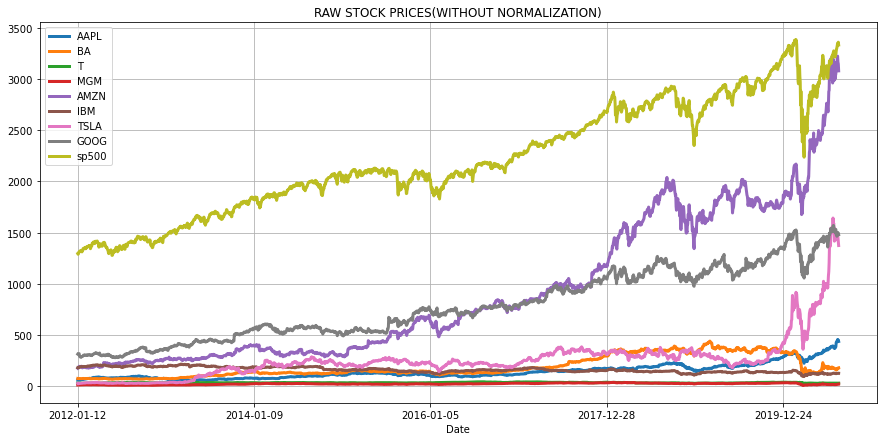

In [12]:
# plot the data
show_plot(stocks_df, 'RAW STOCK PRICES(WITHOUT NORMALIZATION)')

In [13]:
# print normalized/scaled stock prices
def normalize(df):
    x = df.copy()
    # Loop through each stock (while ignoring time columns with index 0)
    for i in x.columns[1:]:
        x[i] = x[i] / x[i][0]
    return x

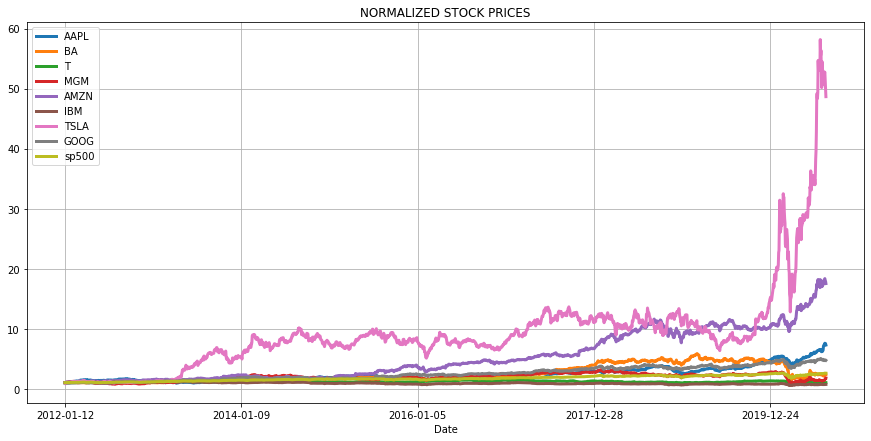

In [14]:
# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

# Interactive Plot Visualization

In [15]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module includes functions that can plot interactive plots easily and effectively.
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance.
def interactive_plot(df, title):
    fig = px.line(title=title)
    # Loop through each stock
    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y=df[i], name=i)

    fig.show(renderer="browser")

In [18]:
# plot interactive plot
interactive_plot(stocks_df, 'Prices')

In [17]:
# plot interactive plot of normalized data
interactive_plot(normalize(stocks_df), 'Normalized Prices')